# IFEST UNPAD - Data Analysis Competition
Anggota Tim : 
- Jeremy
- Gerend Christopher
- Jevan Christopher
- Felix Fernando

Kamus Data

1. Nama : Nama Siswa/Mahasiswa
2. Gender : Jenis Kelamin
3. Bahasa, Inggris, TIK, Matematika, Fisika, Biologi, Geografi, Sosiologi, Antropologi :  Rata-Rata Nilai ketika sekolah
4. Extra_Kurikuler : Ekskul yang diikuti ketika sekolah
5. Tinggal_Dengen : Tempat Siswa/Mahasiswa tinggal
6. Status_Kerja : Apakah siswa/mahasiswa bekerja atau tidak
7. Biaya : Biaya kuliah
8. Tgl_Daftar_Kuliah : Tahun daftar kuliah
9. Alamat : Alamat siswa/mahasiswa
10. UKM : Jenis UKM yang diikuti ketika kuliah
11. Organisasi_Kampus : Apakah mahasiswa mengikuti organisasi kampus
12. Lama_Kuliah : Lama mahasiswa menyelesaikan kuliah (dalam tahun)


NA: Tidak ada data

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Initial Setup

Reading CSV

In [2]:
df = pd.read_csv('Data - Kualifikasi.csv', sep=';')

In [3]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Abbey Butler,Pria,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,"3,5",DKV
1,Abbey Carpenter,Wanita,NaN,Belum,NaN,2009,Bekasi,UKM_2,Tidak,4,FIKOM
2,Abbey Dubois,Wanita,NaN,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,"4,5",FIKOM
3,Abbey Gosling,Wanita,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,"5,5",DKV
4,Abbey Logan,Wanita,Orang Tua,Bekerja,NaN,2009,Bekasi,Tidak,Ya,"6,5",DKV


## Data Cleansing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nama               11499 non-null  object
 1   Gender             11499 non-null  object
 2   Tinggal_Dengan     7517 non-null   object
 3   Status_Kerja       11499 non-null  object
 4   Biaya              7720 non-null   object
 5   Tgl_Daftar_Kuliah  11499 non-null  int64 
 6   Alamat             11499 non-null  object
 7   UKM                11499 non-null  object
 8   Organisasi_Kampus  11499 non-null  object
 9   Lama_Kuliah        11499 non-null  object
 10  Fakultas           11499 non-null  object
dtypes: int64(1), object(10)
memory usage: 988.3+ KB


Null data plot

In [5]:
df.isna().sum()

Nama                    0
Gender                  0
Tinggal_Dengan       3982
Status_Kerja            0
Biaya                3779
Tgl_Daftar_Kuliah       0
Alamat                  0
UKM                     0
Organisasi_Kampus       0
Lama_Kuliah             0
Fakultas                0
dtype: int64

<AxesSubplot:>

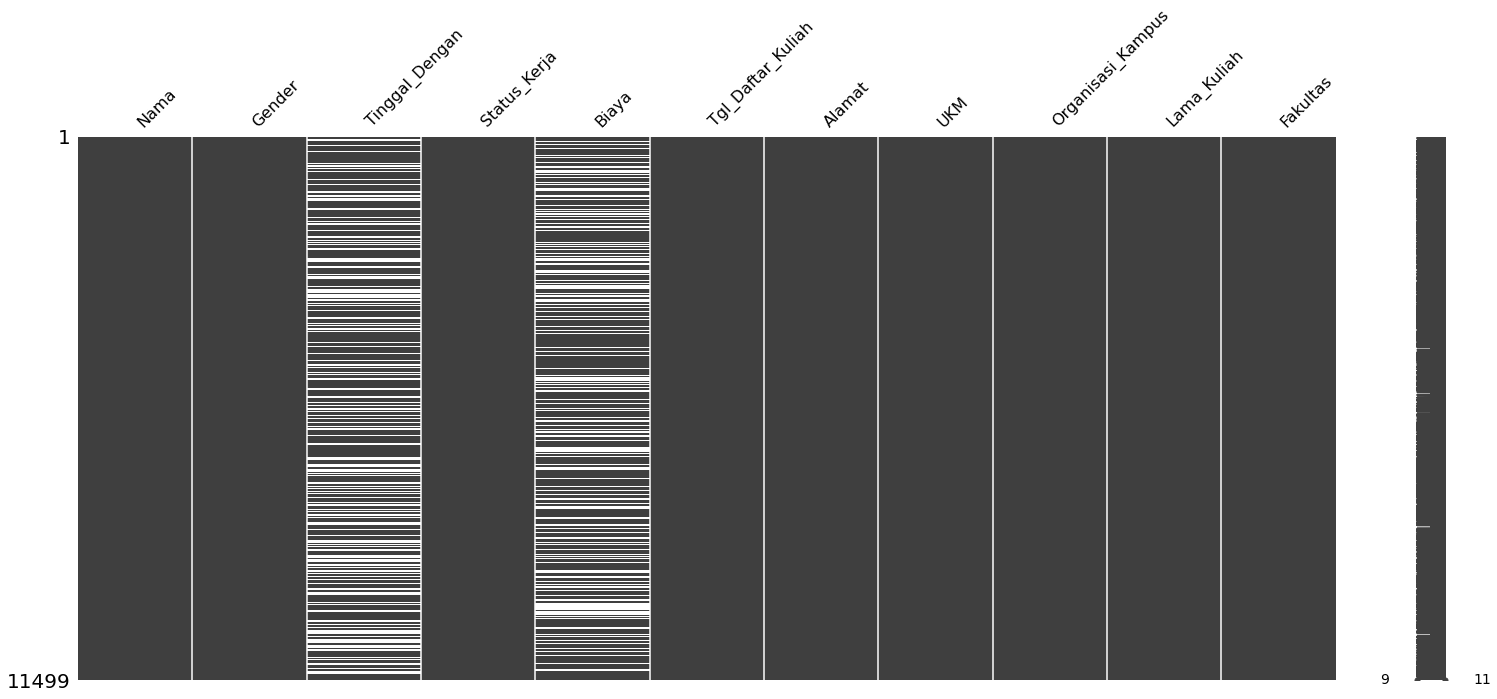

In [6]:
msno.matrix(df)

### Checking unique data of each label

In [7]:
for label in df:
    print(label + ':')
    print(df[label].unique())
    print()

Nama:
['Abbey Butler' 'Abbey Carpenter' 'Abbey Dubois' ... 'Zoe Ogilvy'
 'Zoe Thompson' 'Zoe Varndell']

Gender:
['Pria' 'Wanita']

Tinggal_Dengan:
['Kos' nan 'Orang Tua']

Status_Kerja:
['Belum' 'Bekerja']

Biaya:
['Beasiswa' nan 'Orang Tua']

Tgl_Daftar_Kuliah:
[2008 2009 2007]

Alamat:
['Tangerang' 'Bekasi' 'Serang' 'Bogor' 'Jakarta' 'Karawang']

UKM:
['UKM_3' 'UKM_2' 'UKM_4' 'UKM_1' 'Tidak']

Organisasi_Kampus:
['Ya' 'Tidak']

Lama_Kuliah:
['3,5' '4' '4,5' '5,5' '6,5' '5' '6' '7']

Fakultas:
['DKV' 'FIKOM' 'FISIP' 'FTI' 'FT']



### Handling null data

Asumsi : 
- Data 'Tinggal_Dengan' yang null, artinya mahasiswa tinggal 'sendiri'
- Data 'Biaya' yang null, artinya mahasiswa menggunakan biayanya secara 'mandiri'

In [8]:
df['Tinggal_Dengan'] = df['Tinggal_Dengan'].fillna('Sendiri')
df['Biaya'] = df['Biaya'].fillna('Mandiri')

In [9]:
df.isnull().any()

Nama                 False
Gender               False
Tinggal_Dengan       False
Status_Kerja         False
Biaya                False
Tgl_Daftar_Kuliah    False
Alamat               False
UKM                  False
Organisasi_Kampus    False
Lama_Kuliah          False
Fakultas             False
dtype: bool

Setting data type for specific label

In [10]:
for i in range(len(df)):
    df.at[i, 'Lama_Kuliah'] = float(df.at[i, 'Lama_Kuliah'].replace(',', '.')) # Setting to integer
    if df.at[i, 'Status_Kerja'] == 'Belum': 
        df.at[i, 'Status_Kerja'] = False
    elif df.at[i, 'Status_Kerja'] == 'Bekerja': 
        df.at[i, 'Status_Kerja'] = True
    if df.at[i, 'Organisasi_Kampus'] == 'Ya': 
        df.at[i, 'Organisasi_Kampus'] = True
    elif df.at[i, 'Organisasi_Kampus'] == 'Tidak': 
        df.at[i, 'Organisasi_Kampus'] = False        

df['Jenis_Kelulusan'] = ['Cepat' if df.loc[i, 'Lama_Kuliah'] == 3.5 else 'Tepat Waktu' if df.loc[i, 'Lama_Kuliah'] ==  4 else 'Telat' for i in range(len(df['Lama_Kuliah']))]
df["UKM"] = df["UKM"].replace({
    "UKM_1" : "Olahraga", 
    "UKM_2" : "Seni", 
    "UKM_3" : 'Kewirausahaan',
    "UKM_4" : 'Keilmuan'
    }
)

In [11]:
df.head()

,Nama,Gender,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas,Jenis_Kelulusan
0,Abbey Butler,Pria,Kos,False,Beasiswa,2008,Tangerang,Kewirausahaan,True,3.5,DKV,Cepat
1,Abbey Carpenter,Wanita,Sendiri,False,Mandiri,2009,Bekasi,Seni,False,4.0,FIKOM,Tepat Waktu
2,Abbey Dubois,Wanita,Sendiri,True,Beasiswa,2008,Serang,Keilmuan,False,4.5,FIKOM,Telat
3,Abbey Gosling,Wanita,Orang Tua,False,Beasiswa,2009,Serang,Olahraga,False,5.5,DKV,Telat
4,Abbey Logan,Wanita,Orang Tua,True,Mandiri,2009,Bekasi,Tidak,True,6.5,DKV,Telat


In [12]:
for label in df:
    print(label + ':')
    print(df[label].unique())
    print()

Nama:
['Abbey Butler' 'Abbey Carpenter' 'Abbey Dubois' ... 'Zoe Ogilvy'
 'Zoe Thompson' 'Zoe Varndell']

Gender:
['Pria' 'Wanita']

Tinggal_Dengan:
['Kos' 'Sendiri' 'Orang Tua']

Status_Kerja:
[False True]

Biaya:
['Beasiswa' 'Mandiri' 'Orang Tua']

Tgl_Daftar_Kuliah:
[2008 2009 2007]

Alamat:
['Tangerang' 'Bekasi' 'Serang' 'Bogor' 'Jakarta' 'Karawang']

UKM:
['Kewirausahaan' 'Seni' 'Keilmuan' 'Olahraga' 'Tidak']

Organisasi_Kampus:
[True False]

Lama_Kuliah:
[3.5 4.0 4.5 5.5 6.5 5.0 6.0 7.0]

Fakultas:
['DKV' 'FIKOM' 'FISIP' 'FTI' 'FT']

Jenis_Kelulusan:
['Cepat' 'Tepat Waktu' 'Telat']



## Changing Data Types

In [13]:
df = df.astype({'Status_Kerja': 'bool', 'Organisasi_Kampus': 'bool', 'Lama_Kuliah': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama               11499 non-null  object 
 1   Gender             11499 non-null  object 
 2   Tinggal_Dengan     11499 non-null  object 
 3   Status_Kerja       11499 non-null  bool   
 4   Biaya              11499 non-null  object 
 5   Tgl_Daftar_Kuliah  11499 non-null  int64  
 6   Alamat             11499 non-null  object 
 7   UKM                11499 non-null  object 
 8   Organisasi_Kampus  11499 non-null  bool   
 9   Lama_Kuliah        11499 non-null  float64
 10  Fakultas           11499 non-null  object 
 11  Jenis_Kelulusan    11499 non-null  object 
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 920.9+ KB


## EDA

Statistika Deskriptif

In [14]:
df.describe()

,Tgl_Daftar_Kuliah,Lama_Kuliah
count,11499.000000,11499.000000
mean,2007.996348,5.245804
std,0.816630,1.143226
min,2007.000000,3.500000
25%,2007.000000,4.500000
50%,2008.000000,5.000000
75%,2009.000000,6.000000
max,2009.000000,7.000000


Count lama kuliah untuk masing-masing gender 

<AxesSubplot:xlabel='Lama_Kuliah', ylabel='count'>

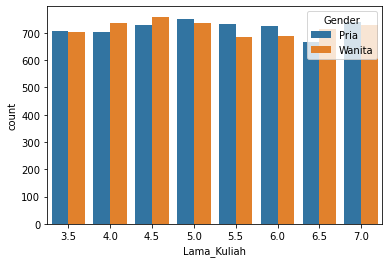

In [15]:
sns.countplot(data=df, x='Lama_Kuliah', hue='Gender')

Count plot setiap kolom

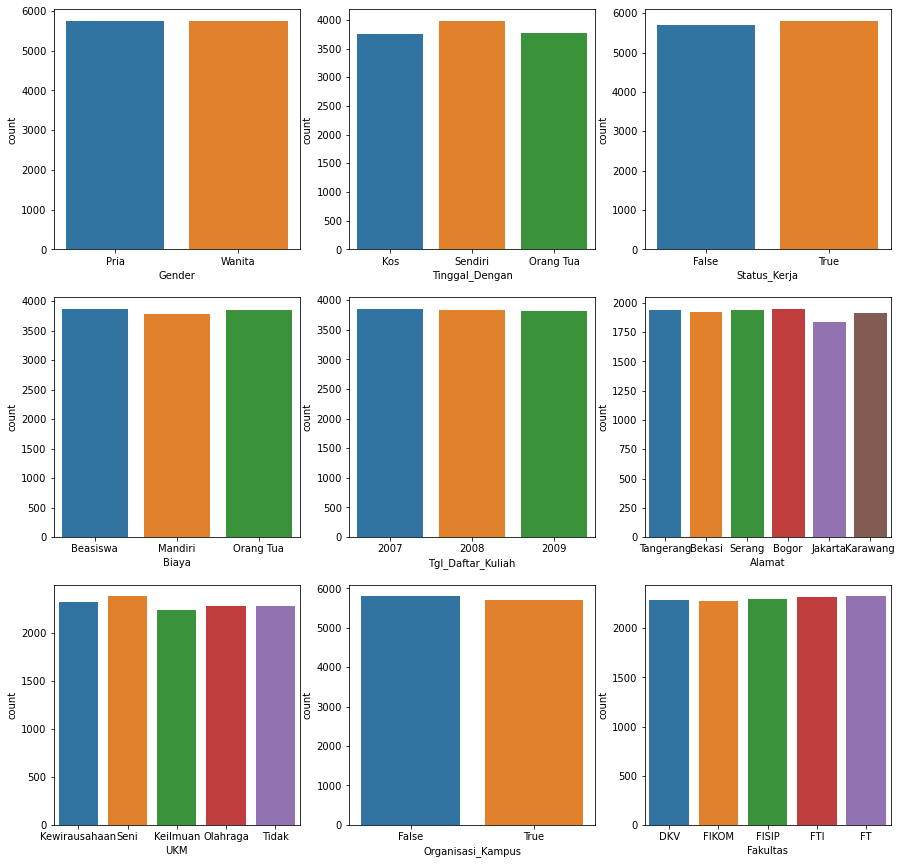

In [16]:
cols = ['Gender', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya', 'Tgl_Daftar_Kuliah', 
        'Alamat', 'UKM', 'Organisasi_Kampus', 'Fakultas']

plt.figure(figsize=(15,15))
for i, col  in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col)

Countplot lama kuliah terkait dengan kolom

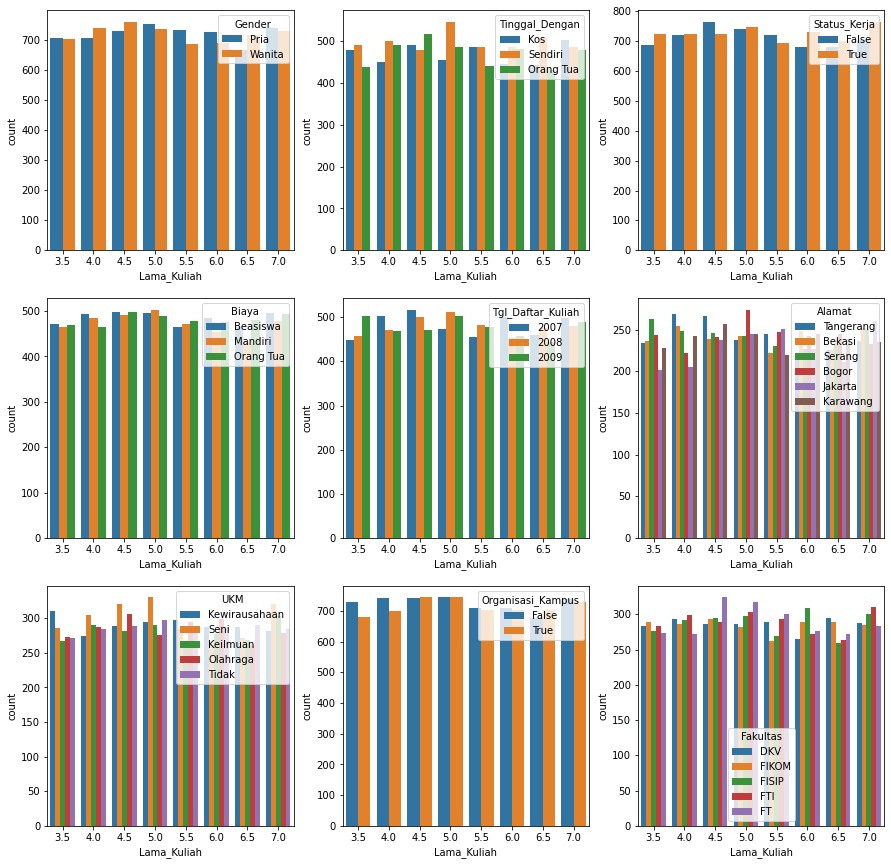

In [17]:
cols = ['Gender', 'Tinggal_Dengan', 'Status_Kerja', 'Biaya', 'Tgl_Daftar_Kuliah', 
        'Alamat', 'UKM', 'Organisasi_Kampus', 'Fakultas']

plt.figure(figsize=(15,15))
for i, col  in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x='Lama_Kuliah', hue=col)

Countplot lulus tepat waktu dan tidak tepat waktu

<AxesSubplot:xlabel='Jenis_Kelulusan', ylabel='count'>

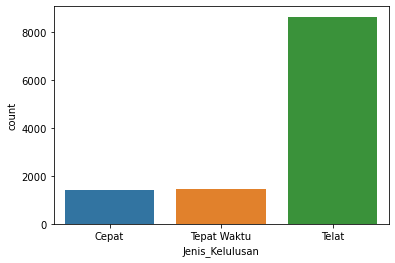

In [18]:
sns.countplot(data=df, x='Jenis_Kelulusan')

Plot masing 

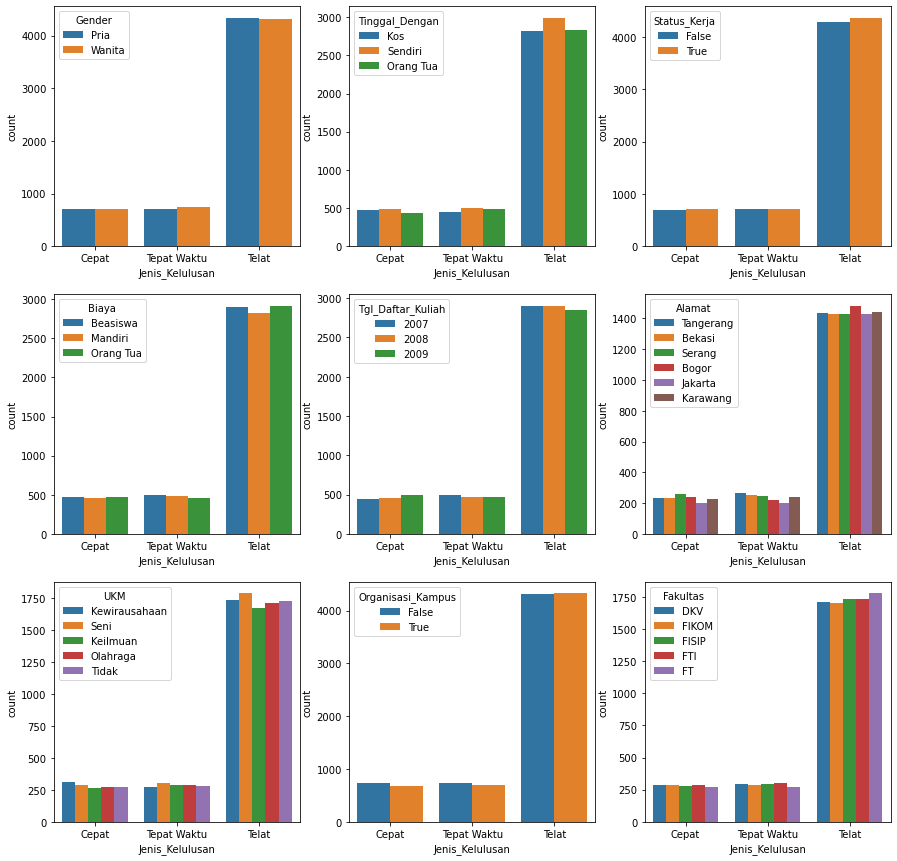

In [22]:
plt.figure(figsize=(15,15))
for i, col  in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x='Jenis_Kelulusan', hue=col)

In [25]:
df[['Tgl_Daftar_Kuliah', 'Fakultas', 'Jenis_Kelulusan']]

,Tgl_Daftar_Kuliah,Fakultas,Jenis_Kelulusan
0,2008,DKV,Cepat
1,2009,FIKOM,Tepat Waktu
2,2008,FIKOM,Telat
3,2009,DKV,Telat
4,2009,DKV,Telat
...,...,...,...
11494,2009,FIKOM,Telat
11495,2008,DKV,Cepat
11496,2007,FT,Telat
11497,2007,DKV,Telat


In [29]:
df.groupby(['Tgl_Daftar_Kuliah', 'Fakultas'])['Jenis_Kelulusan'].count()

Tgl_Daftar_Kuliah  Fakultas
2007               DKV         758
                   FIKOM       778
                   FISIP       771
                   FT          766
                   FTI         782
2008               DKV         754
                   FIKOM       748
                   FISIP       805
                   FT          775
                   FTI         749
2009               DKV         775
                   FIKOM       749
                   FISIP       723
                   FT          781
                   FTI         785
Name: Jenis_Kelulusan, dtype: int64

In [35]:
dummy_df = df.loc[(df['Tgl_Daftar_Kuliah'] == 2007) & (df['Fakultas'] == 'DKV')]['Jenis_Kelulusan'].value_counts()
dummy_df

Telat          579
Tepat Waktu    100
Cepat           79
Name: Jenis_Kelulusan, dtype: int64

In [45]:
# count jenis kelulusan per tahun tiap fakultas

tahun = df['Tgl_Daftar_Kuliah'].unique()
fakultas = df['Fakultas'].unique()

lulus_cepat = []
lulus_tepat_waktu = []
lulus_telat = []

for i in tahun:
    for j in fakultas:
        dummy_df = df.loc[(df['Tgl_Daftar_Kuliah'] == i) & (df['Fakultas'] == j)]['Jenis_Kelulusan'].value_counts()
        lulus_cepat.append((i, j, dummy_df['Cepat']))
        lulus_tepat_waktu.append((i, j, dummy_df['Tepat Waktu']))
        lulus_telat.append((i, j, dummy_df['Telat']))
        
dummy_cepat = pd.DataFrame(lulus_cepat, columns=['Tahun', 'Fakultas', 'Lulus_Cepat'])
dummy_tepat = pd.DataFrame(lulus_tepat_waktu, columns=['Tahun', 'Fakultas', 'Lulus_Tepat_Waktu'])
dummy_telat = pd.DataFrame(lulus_telat, columns=['Tahun', 'Fakultas', 'Lulus_Telat'])

first_merge = pd.merge(dummy_cepat, dummy_tepat, on=['Tahun', 'Fakultas'])
final_merge = pd.merge(first_merge, dummy_telat, on=['Tahun', 'Fakultas'])

final_merge = final_merge.sort_values(by='Tahun').reset_index().drop(columns='index')
final_merge

,Tahun,Fakultas,Lulus_Cepat,Lulus_Tepat_Waktu,Lulus_Telat
0,2007,DKV,79,100,579
1,2007,FIKOM,90,106,582
2,2007,FISIP,107,102,562
3,2007,FTI,88,107,587
4,2007,FT,85,87,594
5,2008,DKV,105,101,548
6,2008,FIKOM,81,83,584
7,2008,FISIP,86,98,621
8,2008,FTI,94,99,556
9,2008,FT,91,91,593


([<matplotlib.axis.XTick at 0x7faf0231d6d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

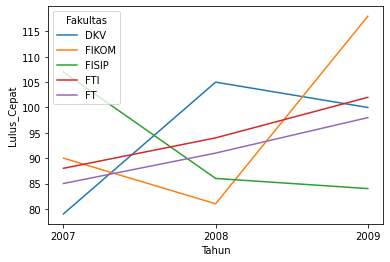

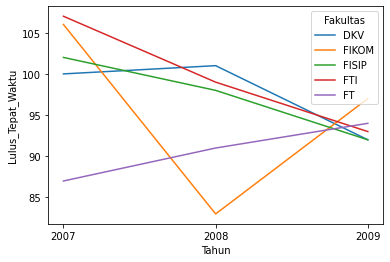

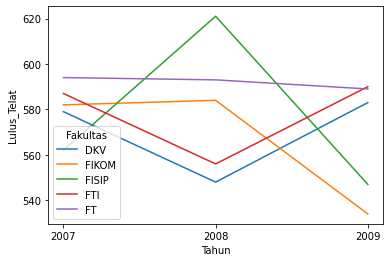

In [56]:
plt.figure()
sns.lineplot(data=final_merge, x='Tahun', y='Lulus_Cepat', hue='Fakultas')
plt.xticks([2007, 2008, 2009])

plt.figure()
sns.lineplot(data=final_merge, x='Tahun', y='Lulus_Tepat_Waktu', hue='Fakultas')
plt.xticks([2007, 2008, 2009])

plt.figure()
sns.lineplot(data=final_merge, x='Tahun', y='Lulus_Telat', hue='Fakultas')
plt.xticks([2007, 2008, 2009])

([<matplotlib.axis.XTick at 0x7faf01c91910>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

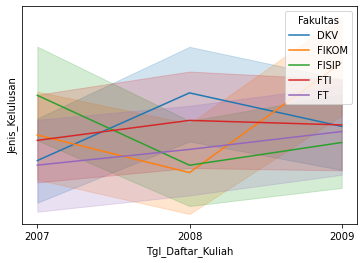

In [54]:
# entah bener dak
sns.lineplot(data=df, x='Tgl_Daftar_Kuliah', y='Jenis_Kelulusan', hue='Fakultas')
plt.xticks([2007, 2008, 2009])

# Save Dataframe to csv/excel

In [ ]:
save_df = df.copy()

save_df.to_csv('Data.csv', index=False)
print('Successfully Saved')

In [58]:
import openpyxl

save_df = df.copy()

save_df.to_excel('Data.xlsx', index=False)
print('Successfully Saved')

Successfully Saved


## Data Preparation

### One-Hot Encoding

Gender

In [ ]:
gender = pd.get_dummies(df.Gender, prefix='Gender')

Label UKM

In [ ]:
ukm = pd.get_dummies(df.UKM)

In [ ]:
ukm.head()

,Tidak,UKM_1,UKM_2,UKM_3,UKM_4
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,1,0,0,0,0


Label Fakultas

In [ ]:
fak = pd.get_dummies(df.Fakultas, prefix='Fakultas')

In [ ]:
fak.head()

,Fakultas_DKV,Fakultas_FIKOM,Fakultas_FISIP,Fakultas_FT,Fakultas_FTI
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


Alamat

In [ ]:
alamat = pd.get_dummies(df.Alamat, prefix='Alamat')

In [ ]:
alamat.head()

,Alamat_Bekasi,Alamat_Bogor,Alamat_Jakarta,Alamat_Karawang,Alamat_Serang,Alamat_Tangerang
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0


Combining Row

In [ ]:
encoding = pd.concat([gender, ukm, fak, alamat], axis=1, join='inner')

In [ ]:
encoding.head()

,Gender_Pria,Gender_Wanita,Tidak,UKM_1,UKM_2,UKM_3,UKM_4,Fakultas_DKV,Fakultas_FIKOM,Fakultas_FISIP,Fakultas_FT,Fakultas_FTI,Alamat_Bekasi,Alamat_Bogor,Alamat_Jakarta,Alamat_Karawang,Alamat_Serang,Alamat_Tangerang
0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
